In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data = pd.read_parquet('/home/praneeth/Desktop/eye_pop_assignment/ep-sai-praneeth-potladurthy/data/dataset.parquet')
img_path = os.path.join(os.getcwd(), data['asset_url'].iloc[0])
annotations = data['annotations'].iloc[0][0]

In [3]:
data

,asset_url,partition,annotations
uuid,,,
067f996eb77e76f58000afe848f91e04,data/images/067f996eb77e76f58000afe848f91e04_i...,train,"[{'classes': [], 'embeddings': [], 'keyPoints'..."
067f996eb808772c80004dea43a9c38f,data/images/067f996eb808772c80004dea43a9c38f_i...,val,"[{'classes': [], 'embeddings': [], 'keyPoints'..."
067f996eb79c76fb800010dd352e1c27,data/images/067f996eb79c76fb800010dd352e1c27_i...,test,[]
067f996eb888784b8000dd6b6fbeacac,data/images/067f996eb888784b8000dd6b6fbeacac_i...,train,"[{'classes': [], 'embeddings': [], 'keyPoints'..."
067f996eb89472a180003cc05ae0d454,data/images/067f996eb89472a180003cc05ae0d454_i...,train,"[{'classes': [], 'embeddings': [], 'keyPoints'..."
...,...,...,...
067f996f2129788e80003dead6851a2c,data/images/067f996f2129788e80003dead6851a2c_i...,train,"[{'classes': [], 'embeddings': [], 'keyPoints'..."
067f996f21377e3c8000a515d3f651a4,data/images/067f996f21377e3c8000a515d3f651a4_i...,train,"[{'classes': [], 'embeddings': [], 'keyPoints'..."
067f996f21a9770b80000a0fdc601047,data/images/067f996f21a9770b80000a0fdc601047_i...,test,[]


In [4]:
def draw_polygon_from_keypoints(image, keypoints, options=None):
    if options is None:
        options = {}
    
    # Default options
    line_color = options.get('line_color', (0, 255, 0))
    line_thickness = options.get('line_thickness', 2)
    point_color = options.get('point_color', (0, 0, 255))
    point_radius = options.get('point_radius', 4)
    fill_polygon = options.get('fill_polygon', False)
    fill_color = options.get('fill_color', (0, 255, 0))
    fill_alpha = options.get('fill_alpha', 0.3)
    show_point_numbers = options.get('show_point_numbers', False)
    
    result_image = image.copy()
    
    if len(keypoints) < 3:
        return result_image
    
    # Convert to numpy array for OpenCV functions
    pts = np.array(keypoints, np.int32)
    
    # Fill polygon if requested
    if fill_polygon:
        overlay = result_image.copy()
        cv2.fillPoly(overlay, [pts], fill_color)
        result_image = cv2.addWeighted(result_image, 1 - fill_alpha, overlay, fill_alpha, 0)
    
    # Draw polygon outline
    # cv2.polylines(result_image, [pts], True, line_color, line_thickness)
    return result_image

In [5]:
def extract_key_points(annotations, image_width, image_height):
    all_tile_keypoints = []
    for tile in annotations['objects']:
        keypoints_array = tile['keyPoints']
        # Extract points from each keypoint object
        pixel_points = []
        for point in keypoints_array[0]['points']:
            # Convert normalized coordinates to pixel coordinates
            pixel_x = int(point['x'] * image_width)
            pixel_y = int(point['y'] * image_height)
            pixel_points.append((pixel_x, pixel_y))
        all_tile_keypoints.append(pixel_points)
    
    return all_tile_keypoints

In [6]:
def process_image(image_path, annotations):
    # Load image
    image = cv2.imread(image_path)
    cv2.imshow
    image_height, image_width = image.shape[:2]
    
    # Extract keypoints
    keypoints = extract_key_points(annotations, image_width, image_height)
    options = {
                'line_color': (0, 255, 0),
                'line_thickness': 2,
                'point_color': (0, 0, 255),
                'point_radius': 4,
                'fill_polygon': True,
                'fill_color': (0, 255, 0),
                'fill_alpha': 0.3,
                'show_point_numbers': True
            }
    print('Keypoints extracted:', keypoints)
    # Draw polygons for each set of keypoints
    for points in keypoints:
        image = draw_polygon_from_keypoints(image, points, options)
    
    return image

In [7]:
img = process_image(img_path, annotations)

Keypoints extracted: [[(3, 0), (218, 1), (217, 65), (1, 64)], [(54, 100), (54, 195), (1, 247), (1, 153)], [(53, 195), (108, 243), (113, 164), (56, 101)], [(104, 256), (53, 199), (1, 253)], [(227, 260), (110, 256), (115, 160), (57, 100), (3, 145), (1, 66), (218, 69)], [(297, 80), (295, 135), (472, 136), (473, 80), (406, 76), (350, 125)], [(475, 77), (494, 63), (415, 64), (409, 74)], [(411, 2), (412, 63), (492, 60), (494, 0)], [(499, 67), (475, 80), (473, 204), (426, 152), (424, 229), (473, 231), (498, 265)], [(296, 136), (302, 227), (353, 227), (427, 154), (475, 200), (473, 138)], [(427, 161), (424, 227), (384, 229), (350, 256), (348, 229)], [(350, 261), (494, 263), (475, 234), (384, 230)], [(353, 0), (353, 120), (412, 66), (414, 0)], [(354, 0), (273, 0), (274, 176), (295, 177), (297, 80), (350, 120)], [(550, 0), (562, 0), (573, 13), (574, 136), (606, 100), (605, 245), (558, 248), (547, 258)], [(573, 71), (640, 72), (640, 138), (608, 102), (576, 131)], [(563, 0), (639, 3), (638, 67), (5

# Display the image with annotations
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.title('Roof Keypoints Visualization')
plt.axis('off')
plt.show()

In [8]:
# Test the new simplified data processing approach
def extract_normalized_keypoints_test(annotations):
    """Test function to extract normalized keypoints directly"""
    all_keypoints = []
    for obj in annotations['objects']:
        keypoints_array = obj['keyPoints']
        normalized_points = []
        for point in keypoints_array[0]['points']:
            # Coordinates are already normalized (0-1)
            normalized_points.extend([point['x'], point['y']])
        all_keypoints.append(normalized_points)
    return all_keypoints

# Test with sample data
normalized_keypoints = extract_normalized_keypoints_test(annotations)
print("Normalized keypoints:", normalized_keypoints)
print("Number of roof segments:", len(normalized_keypoints))
for i, keypoints in enumerate(normalized_keypoints):
    print(f"Segment {i}: {len(keypoints)//2} points")

Normalized keypoints: [[0.005001068115234375, 0.0010004043579101562, 0.342041015625, 0.0030002593994140625, 0.339111328125, 0.10302734375, 0.0030002593994140625, 0.10101318359375], [0.08502197265625, 0.156982421875, 0.08502197265625, 0.305908203125, 0.0020008087158203125, 0.385986328125, 0.0020008087158203125, 0.239990234375], [0.0830078125, 0.305908203125, 0.1689453125, 0.381103515625, 0.177001953125, 0.257080078125, 0.0880126953125, 0.157958984375], [0.1639404296875, 0.40087890625, 0.0830078125, 0.31201171875, 0.0030002593994140625, 0.39599609375], [0.35498046875, 0.406982421875, 0.1719970703125, 0.40087890625, 0.1800537109375, 0.25, 0.09002685546875, 0.156982421875, 0.005001068115234375, 0.22705078125, 0.0020008087158203125, 0.10400390625, 0.341064453125, 0.1090087890625], [0.465087890625, 0.1259765625, 0.4619140625, 0.2110595703125, 0.73779296875, 0.2139892578125, 0.740234375, 0.1259765625, 0.634765625, 0.1190185546875, 0.5478515625, 0.196044921875], [0.7431640625, 0.1209716796875,

In [9]:
# Verify the coordinates are in 0-1 range
for i, keypoints in enumerate(normalized_keypoints):
    coords = np.array(keypoints).reshape(-1, 2)
    print(f"Segment {i}:")
    print(f"  X range: {coords[:, 0].min():.4f} - {coords[:, 0].max():.4f}")
    print(f"  Y range: {coords[:, 1].min():.4f} - {coords[:, 1].max():.4f}")

Segment 0:
  X range: 0.0030 - 0.3420
  Y range: 0.0010 - 0.1030
Segment 1:
  X range: 0.0020 - 0.0850
  Y range: 0.1570 - 0.3860
Segment 2:
  X range: 0.0830 - 0.1770
  Y range: 0.1580 - 0.3811
Segment 3:
  X range: 0.0030 - 0.1639
  Y range: 0.3120 - 0.4009
Segment 4:
  X range: 0.0020 - 0.3550
  Y range: 0.1040 - 0.4070
Segment 5:
  X range: 0.4619 - 0.7402
  Y range: 0.1190 - 0.2140
Segment 6:
  X range: 0.6392 - 0.7729
  Y range: 0.0990 - 0.1210
Segment 7:
  X range: 0.6431 - 0.7729
  Y range: 0.0000 - 0.0990
Segment 8:
  X range: 0.6631 - 0.7808
  Y range: 0.1060 - 0.4150
Segment 9:
  X range: 0.4629 - 0.7422
  Y range: 0.2140 - 0.3560
Segment 10:
  X range: 0.5439 - 0.6680
  Y range: 0.2520 - 0.4009
Segment 11:
  X range: 0.5479 - 0.7729
  Y range: 0.3601 - 0.4121
Segment 12:
  X range: 0.5518 - 0.6470
  Y range: 0.0000 - 0.1880
Segment 13:
  X range: 0.4270 - 0.5532
  Y range: 0.0000 - 0.2781
Segment 14:
  X range: 0.8550 - 0.9482
  Y range: 0.0010 - 0.4041
Segment 15:
  X rang

In [10]:
# Create a sample YOLO format label file content
def create_yolo_label(normalized_keypoints):
    """Create YOLO segmentation label format"""
    label_lines = []
    for keypoints in normalized_keypoints:
        if len(keypoints) >= 6:  # At least 3 points
            coords_str = ' '.join([f"{coord:.6f}" for coord in keypoints])
            label_lines.append(f"0 {coords_str}")  # Class 0 for roof
    return label_lines

# Test YOLO label creation
yolo_labels = create_yolo_label(normalized_keypoints)
print("YOLO format labels:")
for label in yolo_labels:
    print(label)

YOLO format labels:
0 0.005001 0.001000 0.342041 0.003000 0.339111 0.103027 0.003000 0.101013
0 0.085022 0.156982 0.085022 0.305908 0.002001 0.385986 0.002001 0.239990
0 0.083008 0.305908 0.168945 0.381104 0.177002 0.257080 0.088013 0.157959
0 0.163940 0.400879 0.083008 0.312012 0.003000 0.395996
0 0.354980 0.406982 0.171997 0.400879 0.180054 0.250000 0.090027 0.156982 0.005001 0.227051 0.002001 0.104004 0.341064 0.109009
0 0.465088 0.125977 0.461914 0.211060 0.737793 0.213989 0.740234 0.125977 0.634766 0.119019 0.547852 0.196045
0 0.743164 0.120972 0.772949 0.098999 0.649902 0.101013 0.639160 0.116028
0 0.643066 0.004002 0.645020 0.098999 0.770020 0.093994 0.772949 0.000000
0 0.780762 0.106018 0.743164 0.125977 0.740234 0.319092 0.666016 0.238037 0.663086 0.357910 0.740234 0.361084 0.778809 0.415039
0 0.462891 0.213989 0.471924 0.354980 0.551758 0.355957 0.667969 0.241943 0.742188 0.313965 0.740234 0.217041
0 0.667969 0.251953 0.663086 0.354980 0.601074 0.357910 0.546875 0.400879 0.54

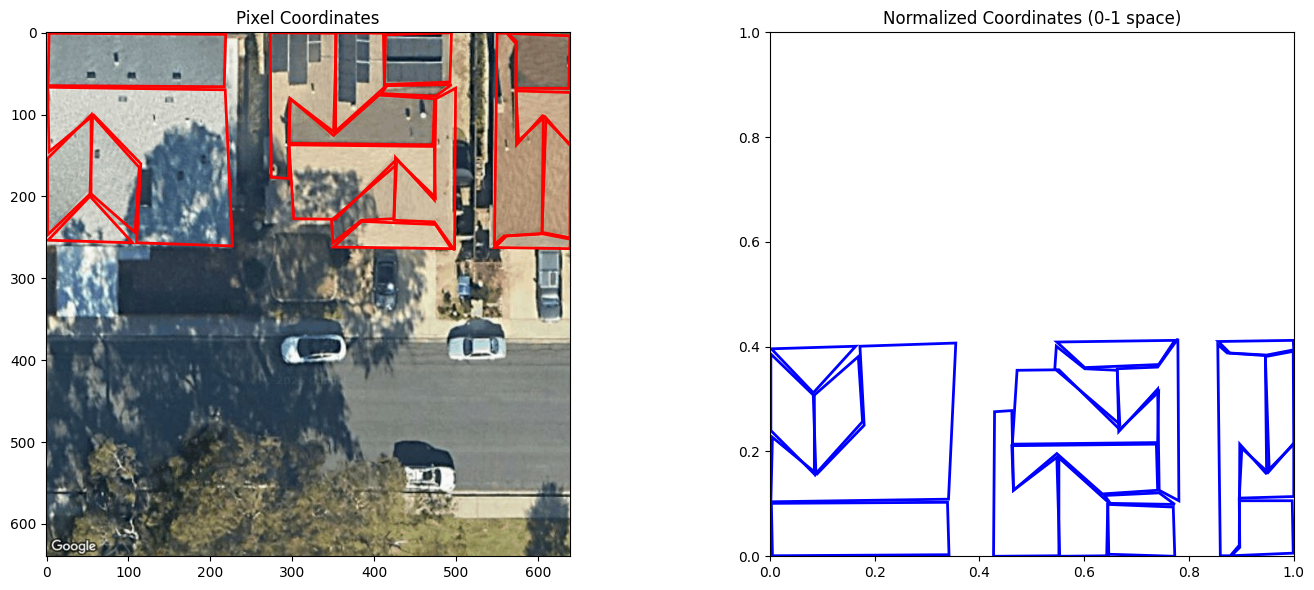

In [11]:
# Visualize the difference between pixel and normalized coordinates
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Load original image for reference
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_height, image_width = image.shape[:2]

# Plot 1: Original image with pixel coordinates
ax1.imshow(image_rgb)
ax1.set_title('Pixel Coordinates')
for i, keypoints in enumerate(normalized_keypoints):
    # Convert normalized to pixel coordinates for visualization
    pixel_coords = []
    for j in range(0, len(keypoints), 2):
        pixel_x = keypoints[j] * image_width
        pixel_y = keypoints[j+1] * image_height
        pixel_coords.extend([pixel_x, pixel_y])
    
    # Plot as polygon
    coords = np.array(pixel_coords).reshape(-1, 2)
    polygon = plt.Polygon(coords, fill=False, edgecolor='red', linewidth=2)
    ax1.add_patch(polygon)

# Plot 2: Normalized coordinates (0-1 space)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_title('Normalized Coordinates (0-1 space)')
ax2.set_aspect('equal')
for i, keypoints in enumerate(normalized_keypoints):
    coords = np.array(keypoints).reshape(-1, 2)
    polygon = plt.Polygon(coords, fill=False, edgecolor='blue', linewidth=2)
    ax2.add_patch(polygon)

plt.tight_layout()
plt.show()

## Direct YOLO Format Generation

This approach is much more efficient because:

1. **No unnecessary conversions**: We keep the normalized coordinates as-is
2. **Direct YOLO format**: The keypoints are already in the exact format YOLO expects
3. **Better precision**: No loss of precision from pixel conversion and back
4. **Simpler pipeline**: Fewer steps means fewer chances for errors

The YOLO segmentation format expects:
```
class_id x1 y1 x2 y2 x3 y3 ... xn yn
```

Where all coordinates are normalized (0-1), which is exactly what we have!

In [12]:
# Demonstrate the efficiency difference
print("=== EFFICIENT APPROACH ===")
print("Dataset normalized keypoints → Augmentation (if needed) → Direct YOLO labels")
print()
print("=== INEFFICIENT APPROACH (what we were doing before) ===")
print("Dataset normalized keypoints → Convert to pixels → Create mask → Extract contours → Normalize again → YOLO labels")
print()
print("The efficient approach eliminates 4 unnecessary steps!")

=== EFFICIENT APPROACH ===
Dataset normalized keypoints → Augmentation (if needed) → Direct YOLO labels

=== INEFFICIENT APPROACH (what we were doing before) ===
Dataset normalized keypoints → Convert to pixels → Create mask → Extract contours → Normalize again → YOLO labels

The efficient approach eliminates 4 unnecessary steps!
